### Import all necessary libraries for analysis


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from datetime import datetime

### Reading the data into pandas dataframe

In [155]:
Amazon_Prime = pd.read_csv('Amazon_Prime_Users.csv')
print("Rows, cols:", Amazon_Prime.shape)
display(Amazon_Prime.head(5))
Amazon_Prime.info()

Rows, cols: (2530, 19)


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,3/6/1953,Male,Rebeccachester,15/1/2024,14/1/2025,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3.0
1,2,Scott Allen,scott22@example.org,scott22,8/7/1978,Male,Mcphersonview,7/1/2024,6/1/2025,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7.0
2,3,Jonathan Parrish,brooke16@example.org,brooke16,6/12/1994,Female,Youngfort,13/4/2024,13/4/2025,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8.0
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,22/12/1964,Female,Feliciashire,24/1/2024,23/1/2025,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7.0
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,4/6/1961,Male,Port Deborah,14/2/2024,13/2/2025,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   User ID                        2530 non-null   int64  
 1   Name                           2530 non-null   object 
 2   Email Address                  2530 non-null   object 
 3   Username                       2530 non-null   object 
 4   Date of Birth                  2530 non-null   object 
 5   Gender                         2530 non-null   object 
 6   Location                       2530 non-null   object 
 7   Membership Start Date          2530 non-null   object 
 8   Membership End Date            2530 non-null   object 
 9   Subscription Plan              2530 non-null   object 
 10  Payment Information            2530 non-null   object 
 11  Renewal Status                 2530 non-null   object 
 12  Usage Frequency                2530 non-null   o

In [156]:
Amazon_Prime = Amazon_Prime.dropna(subset=['Feedback/Ratings', 'Customer Support Interactions'])

### Question 1 :

Is there a significant association between younger users aged 18–30 with high streaming frequency and their likelihood of providing an ‘excellent’ rating for Prime Video content?

In [157]:
Amazon_Prime['Date of Birth'] = pd.to_datetime(Amazon_Prime['Date of Birth'], errors='coerce')
Amazon_Prime['age'] = (pd.Timestamp.today() - Amazon_Prime['Date of Birth']).dt.days // 365

Amazon_Prime['age_group'] = pd.cut(Amazon_Prime['age'], 
                         bins=[0,18,30,40,60,200], 
                         labels=['<18','18-30','31-40','41-60','60+'])

In [158]:
print("\nUnique Usage Frequency values:", Amazon_Prime['Usage Frequency'].unique())


Unique Usage Frequency values: ['Regular' 'Frequent' 'Occasional']


In [159]:
Amazon_Prime['Excellent_Rating'] = Amazon_Prime['Feedback/Ratings'].apply(
    lambda x: "Excellent" if x >= 4.5 else "Not_Excellent"
)

In [160]:
Amazon_Prime['High_Streaming'] = Amazon_Prime['Usage Frequency'].apply(
    lambda x: "High_Streaming" if x == "Frequent" else "Low_Streaming"
)

In [161]:
young_users = Amazon_Prime[Amazon_Prime['age_group'] == '18-30']
print("\nTotal 18-30 users:", len(young_users))


Total 18-30 users: 129


In [162]:
crosstab = pd.crosstab(
    young_users['High_Streaming'], 
    young_users['Excellent_Rating']
)

crosstab_norm = pd.crosstab(
    young_users['High_Streaming'],
    young_users['Excellent_Rating'],
    normalize='index'
)

print(crosstab)
print(crosstab_norm)


Excellent_Rating  Excellent  Not_Excellent
High_Streaming                            
High_Streaming           10             34
Low_Streaming            23             62
Excellent_Rating  Excellent  Not_Excellent
High_Streaming                            
High_Streaming     0.227273       0.772727
Low_Streaming      0.270588       0.729412


<Figure size 640x480 with 0 Axes>

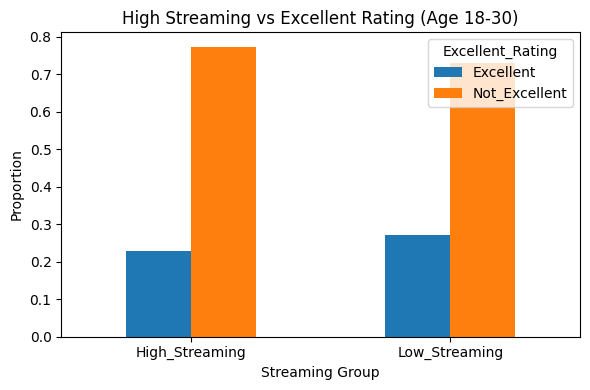

In [163]:
plt.figure()
crosstab_norm.plot(kind='bar', figsize=(6,4))
plt.title("High Streaming vs Excellent Rating (Age 18-30)")
plt.xlabel("Streaming Group")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


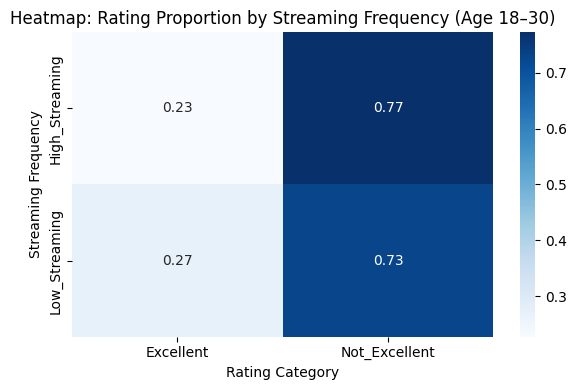

In [164]:
plt.figure(figsize=(6,4))
sns.heatmap(crosstab_norm, annot=True, cmap="Blues", fmt=".2f")
plt.title("Heatmap: Rating Proportion by Streaming Frequency (Age 18–30)")
plt.ylabel("Streaming Frequency")
plt.xlabel("Rating Category")
plt.tight_layout()
plt.show()

In [ ]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("\nCHI-SQUARE TEST RESULTS")
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("\nINTERPRETATION: There IS a significant association between high streaming frequency "
          "and giving 'Excellent' ratings among 18–30 age users.")
else:
    print("\nINTERPRETATION: There is NO significant statistical association between high streaming frequency "
          "and excellent ratings among 18–30 age users.")


CHI-SQUARE TEST RESULTS
Chi-square: 0.10350043297277577
p-value: 0.74766874062885
Degrees of freedom: 1

INTERPRETATION: There is NO significant statistical association between high streaming frequency and excellent ratings among 18–30 age users.
